<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:180%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Water Quality <i class="fas fa-hand-holding-water"></i> 🌊 </h1></div>

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify"> 
La purification de l'eau est le processus d'élimination des produits chimiques indésirables, des contaminants biologiques, des solides en suspension et des gaz de l'eau. L'objectif est de produire de l'eau adaptée à des fins spécifiques. La plupart de l'eau est purifiée et désinfectée pour la consommation humaine (eau potable), mais la purification de l'eau peut également être effectuée à diverses autres fins, notamment des applications médicales, pharmacologiques, chimiques et industrielles. Les méthodes utilisées comprennent des processus physiques tels que la filtration, la sédimentation et la distillation ; les processus biologiques tels que les filtres à sable lents ou le charbon biologiquement actif ; les procédés chimiques tels que la floculation et la chloration ; et l'utilisation de rayonnement électromagnétique tel que la lumière ultraviolette.

Selon un rapport de 2007 de l'Organisation mondiale de la santé (OMS), 1,1 milliard de personnes n'ont pas accès à un approvisionnement en eau potable amélioré ; 88 % des 4 milliards de cas annuels de maladies diarrhéiques sont attribués à une eau insalubre et à un assainissement et une hygiène inadéquats, tandis que 1,8 million de personnes meurent chaque année de maladies diarrhéiques. L'OMS estime que 94% de ces cas de maladies diarrhéiques sont évitables grâce à des modifications de l'environnement, y compris l'accès à l'eau potable. Des techniques simples pour traiter l'eau à la maison, telles que la chloration, les filtres et la désinfection solaire, et pour la stocker dans des conteneurs sûrs pourraient sauver un grand nombre de vies chaque année. La réduction des décès dus aux maladies d'origine hydrique est un objectif majeur de santé publique dans les pays en développement. 
     
L'eau contaminée et un mauvais assainissement sont liés à la transmission de maladies telles que le **choléra, la diarrhée, la dysenterie, l'hépatite A, la typhoïde et la polio**. Des services d'eau et d'assainissement absents, inadéquats ou mal gérés exposent les individus à des risques sanitaires évitables. Elle est donc aujourd'hui très importante pour la santé publique, qu'elle soit utilisée pour la consommation, l'usage domestique, la production alimentaire ou à des fins récréatives. L'amélioration de l'approvisionnement en eau et de l'assainissement, ainsi qu'une meilleure gestion des ressources en eau, peuvent booster la croissance économique des pays et peuvent grandement contribuer à la réduction de la pauvreté.

Il s'agira donc, à partir de ce projet, d'utiliser l'ensemble de données **Water Quality** pour comprendre ce qui constitue une eau potable sûre et lui appliquer l'apprentissage automatique pour faire la distinction entre l'eau potable et non potable.
     
     
 </p></font></div>

## Table of Contents
* **Importing libraries and loading data**
* **EDA :**
    * Shape / Info
    * NaN values
    * Target Vizualisation
    * Variables description
    * Variables visualization
    * Variables correlation
    * Variables - Target correlation
* **Pre-Processing :**
    * Outliers extraction
    * Missing data
    * Skewness Correction
    * Normalization
    * Train Test Split
    * Smote
* **Modeling :**
    * Testing different classifiers
    * Hyperparameters Tuning
    * Voting Classifier

# Descriptions des colonnes

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

1. **ph**: pH of 1. water (0 to 14).

2. **Hardness**: Capacity of water to precipitate soap in mg/L.

3. **Solids**: Total dissolved solids in ppm.

4. **Chloramines**: Amount of Chloramines in ppm.

5. **Sulfate**: Amount of Sulfates dissolved in mg/L.

6. **Conductivity**: Electrical conductivity of water in μS/cm.

7. **Organic_carbon**: Amount of organic carbon in ppm.

8. **Trihalomethanes**: Amount of Trihalomethanes in μg/L.

9. **Turbidity**: Measure of light emiting property of water in NTU.

10. **Potability**: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

 </p></font></div>

# Importation des librairies


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm, boxcox
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model # Le modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score # Métriques d'évaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE
from scipy.stats import norm, boxcox, normaltest, probplot
import xgboost as xgb
import warnings
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_classif
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")

/kaggle/input/water-potability/water_potability.csv


# Chargement des données


In [2]:
data = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Partie analyse : Exploratory Data Analysis (EDA) 🌊 </h1></div> 

L’analyse exploratoire des données (EDA) est effectuée afin d’acquérir une compréhension préliminaire et de nous permettre de nous familiariser avec l’ensemble de données. Dans un projet de science des données typique, l’une des premières choses que je ferais est de « regarder les données » en effectuant EDA afin d’acquérir une meilleure compréhension des données.
Trois grandes approches EDA que j’utilise normalement comprennent:
Statistiques descriptives — Moyenne, médiane, mode, écart type
Visualisations de données — Cartes thermiques (intra-corrélation des entités de discernement), boîte à moustaches (visualiser les différences de groupe), nuages de points (visualiser les corrélations entre les entités), analyse en composantes principales (visualiser la distribution des agrégats présentés dans l’ensemble de données), etc.
Mise en forme des données — Données pivotantes, regroupement des données, filtrage des données, etc.

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.shape
#Taille du dataset

(3276, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
data.isnull().sum()
#Nombre de valeurs nulle pour chaque colonne

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
On commence par faire un rapide parcour des données, on peut donc en tirer les informations suivantes :

* Taille : (3276,10)
* Types des variables : Toutes les colonnes sont des float64, a l'exception de la potabilité en int64
* Valeurs nulles : Il y a des valeurs NaN dans les colonnes suivantes : Sufates, ph, Trihalomethanes

 </p></font></div>



<AxesSubplot:>

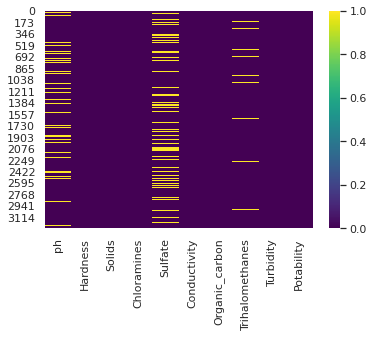

In [8]:
sns.heatmap(data.isnull(),cmap='viridis')

In [9]:
print("NaN values :")
#pourcentage de valeurs nulles pour chaque colonne
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)*100

NaN values :


Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
 
En faisant l’analyse de données, nous somme tomber sur un obstacle qui peut détruire chaque processus d’analyse de données.
Cet obstacle est connu sous le nom de valeurs NaN dans la science des données et l’apprentissage automatique.

NaN ou Not a Number sont des valeurs spéciales dans les tableaux DataFrame et numpy qui représentent la valeur manquante dans une cellule. Dans les langages de programmation, ils sont également représentés, par exemple en Python, ils sont représentés en tant que valeur None.
Vous pouvez penser que les valeurs None (ou NaN) sont simplement des zéros, car elles représentent l’absence d’une valeur. Mais voici un piège, la différence entre zéro et none valeur est que zéro est une valeur (par exemple entier ou float), tandis que le None valeur représente l’absence de cette valeur. Voici un mème qui explique très bien la différence entre les valeurs None et zéro :

En quoi la valeur NaN est-elle dangereuse ?
Les valeurs NaN sont dangereuses de deux manières :
Le changement de certaines mesures en tant que valeurs moyennes ou médianes, donnant ainsi des informations erronées.
Les algorithmes ne peuvent pas fonctionner sur les jeux de données qui ont de telles valeurs.
 </p></font></div>


In [10]:
target_counts = data["Potability"].value_counts()
fig = px.pie(target_counts, values="Potability",names=["Not Potable","Potable"],color = ["Not Potable","Potable"],
             color_discrete_map={'Potable':'#51C4D3','Not Potable':'#74C365'})
fig.add_annotation(text='Repartition des données selon la potabilité',
                   x=1.1,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.update_traces(textposition='inside', hole =.4,opacity=0.9,textinfo='percent+label')
fig.update_layout(title=dict(text='Water Potability', x=0.5), legend=dict(x=0.43, y=0, orientation='h'))
fig.show()

On observe que les données sont déséquilibrées

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
 
Un jeu de données déséquilibré est un jeu de données dans lequel la variable cible a plus d’observations dans une classe spécifique que les autres.

Cela ne devient un problème que lorsque cette « propriété » affecte les performances des algorithmes ou des modèles que vous pouvez obtenir.
Si les classes sont séparables à l’aide des fonctionnalités disponibles, la distribution des classes entre elles n’est pas problématique.
En outre, le problème est que les modèles formés sur des ensembles de données déséquilibrés ont souvent de mauvais résultats lorsqu’ils doivent généraliser (prédire une classe ou classer des observations invisibles). Malgré l’algorithme que vous choisissez, certains modèles seront plus sensibles aux données déséquilibrées que d’autres. 
 
L’algorithme reçoit beaucoup plus d’exemples d’une classe, ce qui l’incite à être biaisé vers cette classe particulière. Il n’apprend pas ce qui rend l’autre classe « différente » et ne parvient pas à comprendre les modèles sous-jacents qui nous permettent de distinguer les classes.
L’algorithme apprend qu’une classe donnée est plus courante, ce qui rend « naturel » qu’il y ait une plus grande tendance à son égard. L’algorithme est alors enclin à surajustement de la classe majoritaire. Rien qu’en prédisant la classe majoritaire, les modèles obtiennent un score élevé sur leurs fonctions de perte. Dans ces cas, le paradoxe de précision apparaît.
     
  </p></font></div>


### Distribution des données

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
Nous pouvons tenter de déterminer si les données présentent une distribution vaguement normale simplement en regardant l’histogramme. Cependant, nous pouvons avoir besoin de techniques d’analyse supplémentaires pour nous aider à décider si la distribution est suffisamment normale pour justifier l’utilisation de tests paramétriques.

Figure 1 : Histogramme
Les histogrammes vont nous permettre de regrouper les données dans des groupes et sont le moyen le plus rapide d’avoir une idée de la distribution de chaque attribut dans le jeu de données. Voici quelques-unes des caractéristiques des histogrammes.
* Il nous fournit un décompte du nombre d’observations dans chaque bac créé pour la visualisation.
* Nous pouvons facilement observer la distribution, c’est-à-dire que la météo est gaussienne, asymétrique ou exponentielle.
* Les histogrammes nous aident également à voir les valeurs aberrantes possibles.

Figure 2 : Distplot
Le diagramme montre à la fois l’histogramme (nombres de groupes) ainsi qu’une estimation lisse de la fonction de densité de probabilité aussi appelé Skewness en anglais.
L’une de ces techniques consiste à calculer l’asymétrie de l’ensemble de données. La distribution normale est parfaitement symétrique par rapport à la moyenne, et donc tout écart par rapport à la symétrie parfaite indique un certain degré de non-normalité dans la distribution mesurée.

Le diagramme suivant fournit des exemples de formes de distribution asymétriques.

![](https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png?w=584&ssl=1)

L’asymétrie peut être un nombre positif ou négatif (ou zéro). Les distributions symétriques par rapport à la moyenne, telles que la loi normale, ont une asymétrie nulle. Une distribution qui « penche » vers la droite a une asymétrie négative, et une distribution qui « penche » vers la gauche a une asymétrie positive.
En règle générale, les valeurs d’asymétrie qui se trouvent à l’intérieur de ±1 de l’asymétrie de la loi normale indiquent une normalité suffisante pour l’utilisation de tests paramétriques.

Figure 3 : Histplot

De meme que la figure precedente appliquer a une eau potable et non potable pour observer plus en détail la distribution ainsi que la distribution de probabilité.

Figure 3 : Boxplot

Une boxplot ou boîte à moustaches est une méthode permettant de montrer graphiquement l’étalement d’une variable numérique à travers des quartiles. Il montre le minimum, le maximum, la médiane, le premier quartile et le troisième quartile dans l’ensemble de données, on pourra également y voir au dela les valeurs aberrantes.
</p></font></div>

In [11]:
def var_visualisation(df, target, var, color): #fonction affichant les 4 figures décrites précédement
    colors = {"orange":"YlOrRd", "green":"YlGn", "blue":"PuBu", "purple":"BuPu"}
    var_col = df[var]
    
    fig, axs = plt.subplots(2,2, figsize=(12,8))
    fig.suptitle(var, weight='bold', fontsize=16)
    axs[0][0].set_title(f"{var} Histogram")
    axs[0][0].hist(var_col, bins=10, color=color)
    axs[0][1].set_title(f"{var} Displot")
    sns.distplot(var_col, fit=norm, color=color, ax=axs[0][1])
    axs[0][1].legend([f"Skew : {var_col.skew():.2f}\nKurt  : {var_col.kurt():.2f}"])
    axs[1][0].set_title(f"Histplot - {var} by {target}")
    sns.histplot(df, x=var, hue=target, kde=True, palette=colors[color], ax=axs[1][0])
    axs[1][1].set_title(f"Boxplot - {var} by {target}")
    sns.boxplot(df[target], var_col, palette=colors[color], ax=axs[1][1])
    plt.tight_layout()
    plt.show()


**pH**


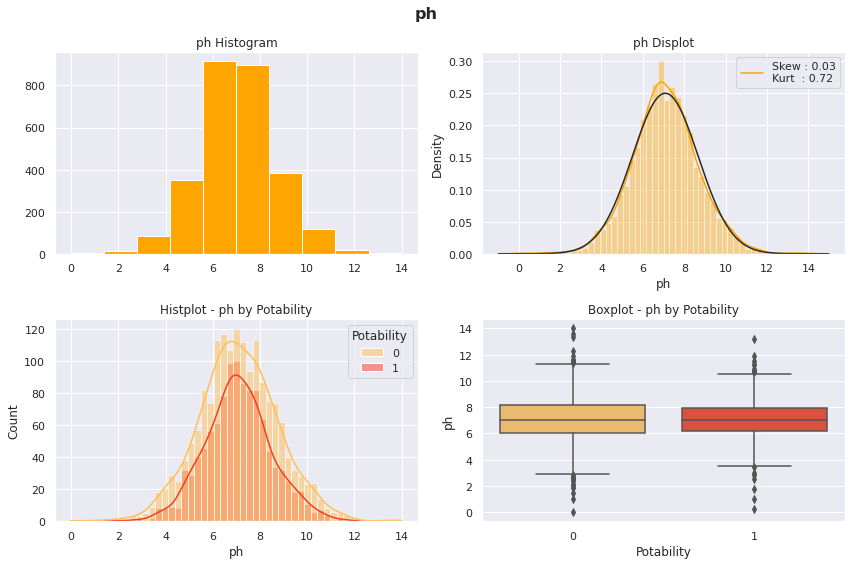

In [12]:
var_visualisation(data, 'Potability', 'ph', 'orange')

- La distribution ressemble à une distribution normale.
- Le ph ne semble pas avoir beaucoup d'influence sur la potabilité.

**Hardness**

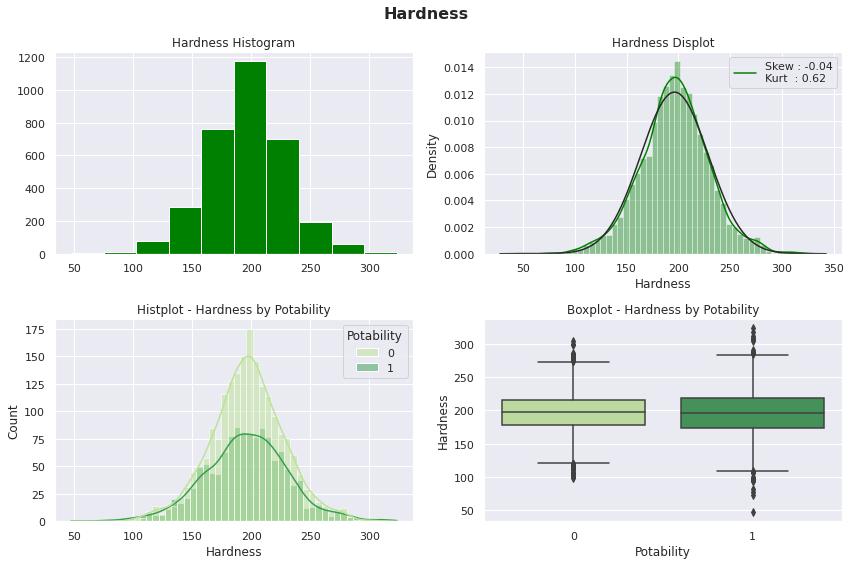

In [13]:
var_visualisation(data, 'Potability', 'Hardness', 'green')

La distribution ressemble à une distribution normale.

**Solids**

KeyError: 'gray'

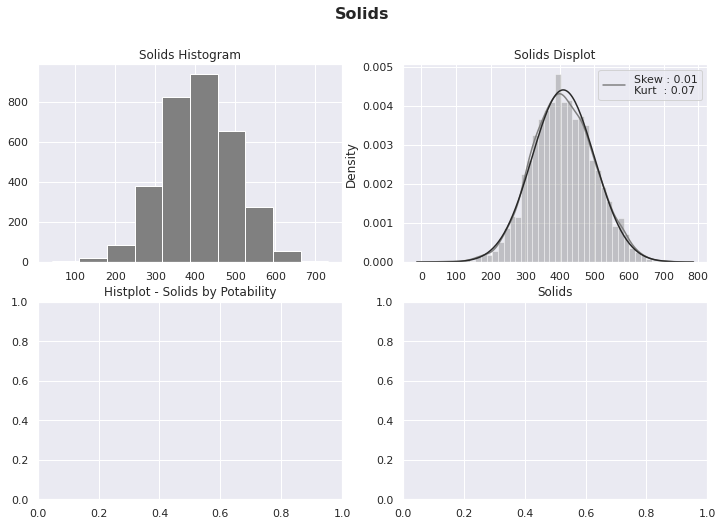

In [55]:
var_visualisation(data, 'Potability', 'Solids', 'blue')

- Il y a une asymétrie de droite (qui pourra etre corriger par la suite)
- On peut voir une différence sur la répartition des différentes classes.

**Chloramines**

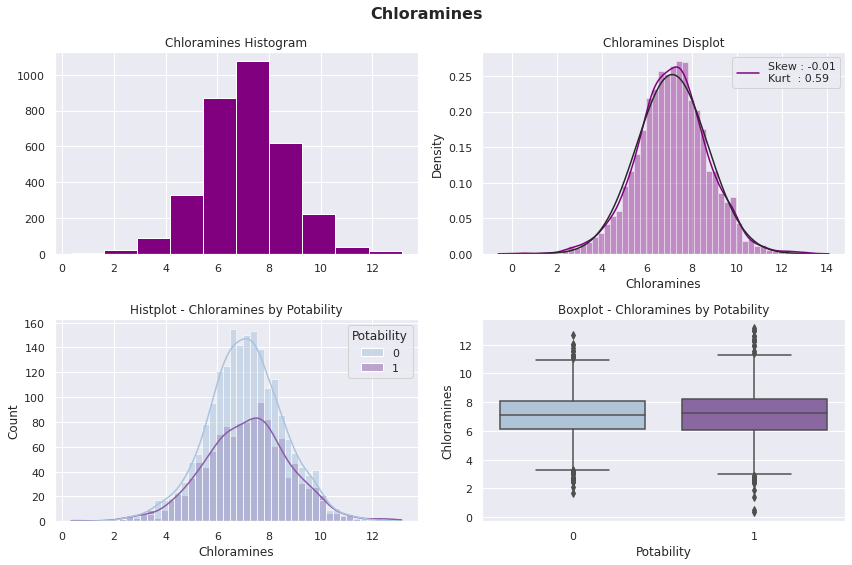

In [15]:
var_visualisation(data, 'Potability', 'Chloramines', 'purple')

- La distribution ressemble à une distribution normale.
- On peut voir une petite différence sur la répartition par rapport à la potabilité.

**Sulfate**

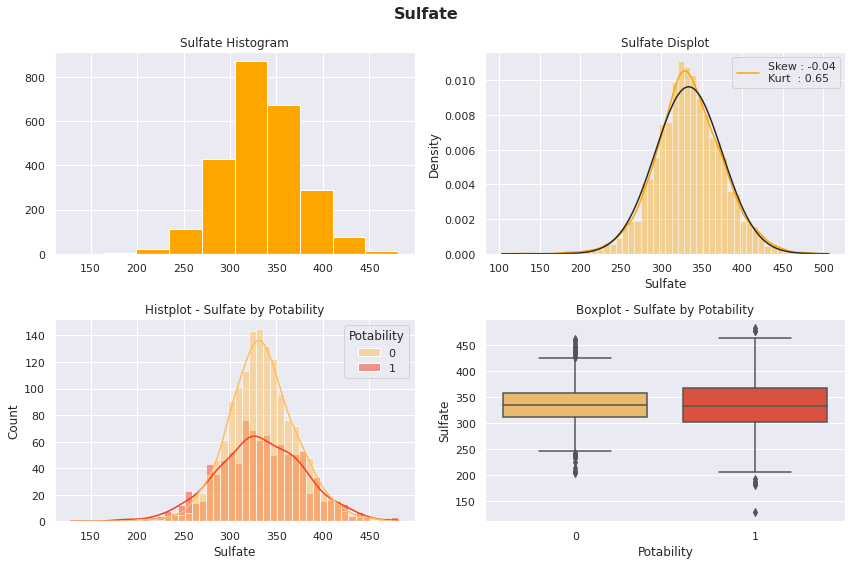

In [16]:
var_visualisation(data, 'Potability', 'Sulfate', 'orange')

- La distribution du sulfate ressemble à une distribution normale.
- La répartition est plus plate lorsque l'eau est potable.

**Conductivity**


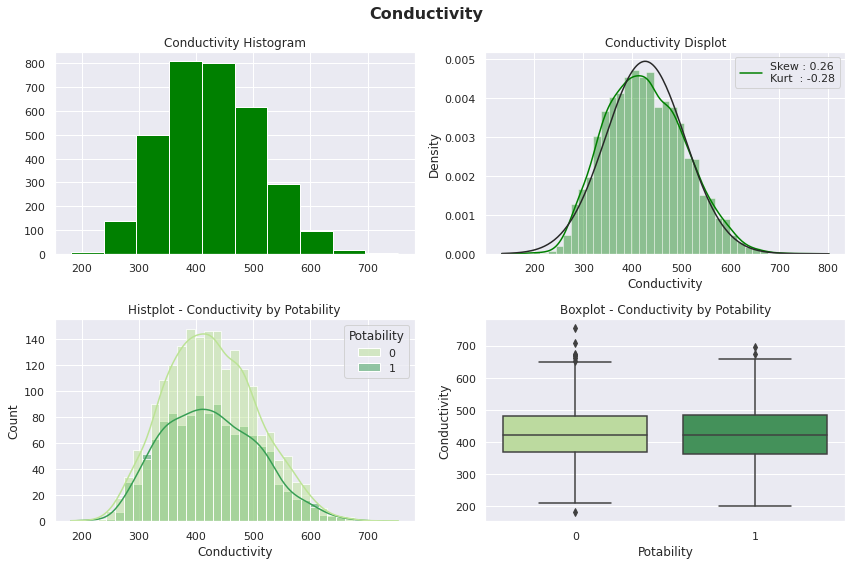

In [17]:
var_visualisation(data, 'Potability', 'Conductivity', 'green')

Il y a une asymétrie de droite.

**Organic_carbon** 


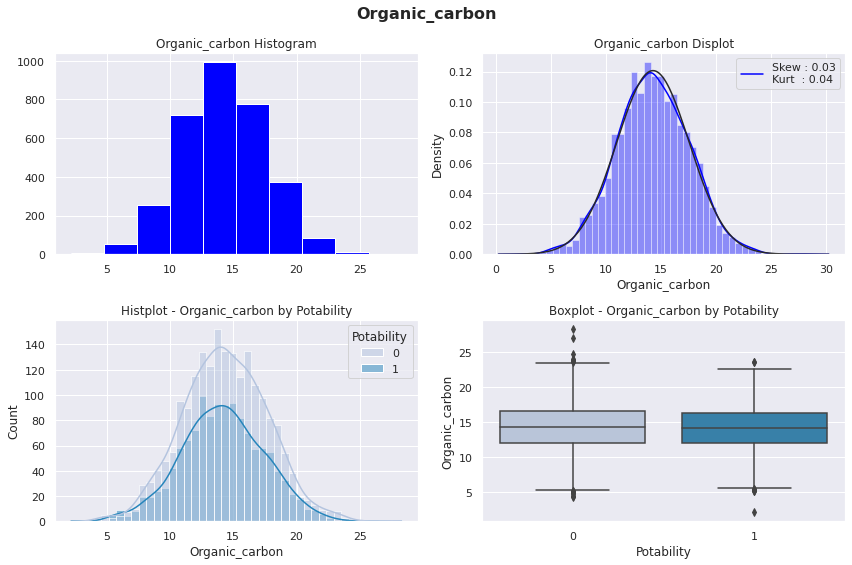

In [18]:
var_visualisation(data, 'Potability', 'Organic_carbon', 'blue')

- La distribution ressemble à une distribution normale.
- On peut voir une petite différence sur la répartition par rapport à la potabilité.

**Trihalomethanes** 


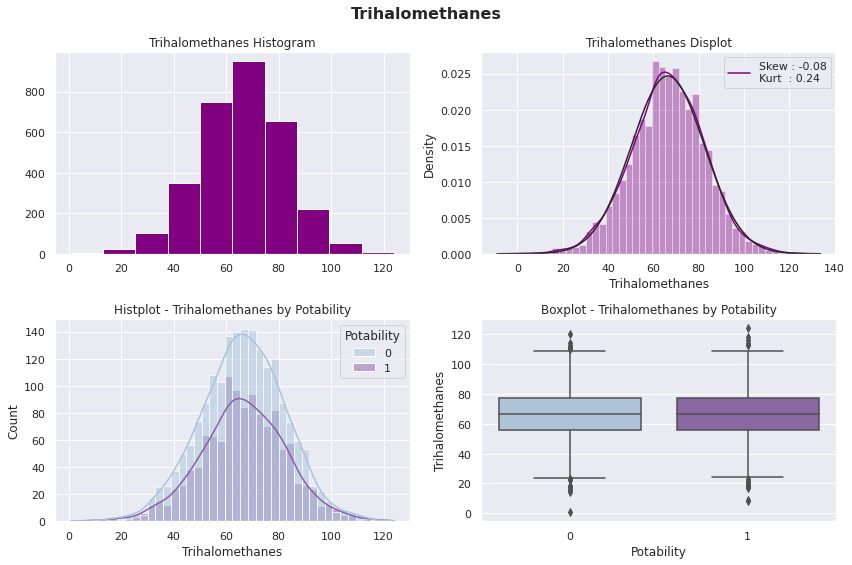

In [19]:
var_visualisation(data, 'Potability', 'Trihalomethanes', 'purple')

La distribution ressemble à une distribution normale.

**Turbidity**

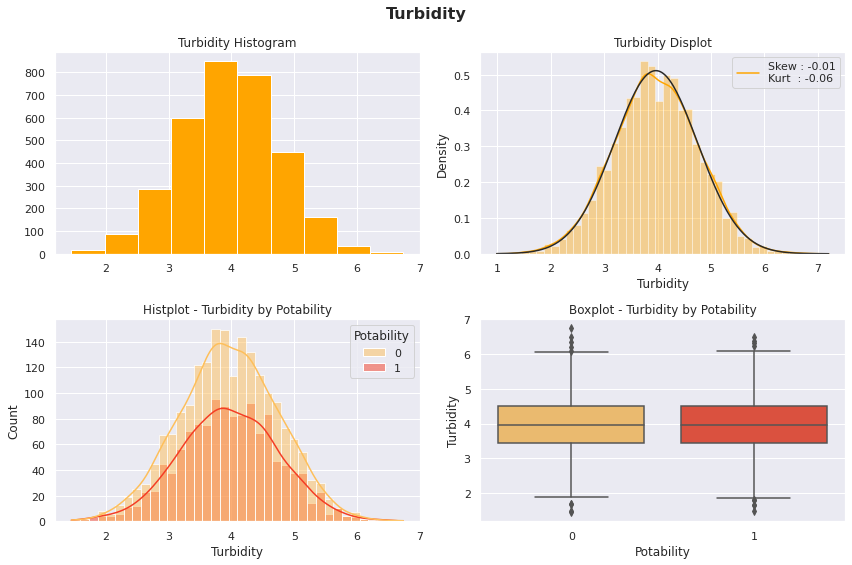

In [20]:
var_visualisation(data, 'Potability', 'Turbidity', 'orange')

- La distribution ressemble à une distribution normale.
- La turbidité ne semble pas avoir beaucoup d'influence sur la potabilité.

# **Variabes correlation**

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
Nous allons étudier ici la corrélation entre les données de notre dataset. La corrélation correspond a un e technique statistique permettant de déterminer comment une variable se déplace/change par rapport à l’autre variable. Cela nous donne une idée du degré de relation entre les deux variables. Il s’agit d’une mesure d’analyse bivariée qui décrit l’association entre différentes variables. Elle a va donc expliquer comment une ou plusieurs variables sont liées les unes aux autres. 

Dans la plupart des cas, il est utile d’exprimer un sujet en termes de relation avec les autres.

1. Si deux variables sont étroitement corrélées, nous pouvons prédire une variable de l’autre.
2. La corrélation joue un rôle essentiel dans la localisation des variables importantes dont dépendent d’autres variables.
3. Il est utilisé comme base pour diverses techniques de modélisation.
4. Une analyse de corrélation appropriée permet de mieux comprendre les données.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png)
![](https://miro.medium.com/max/989/1*pd3jzjw54wAv-h1hUdFmpg.png)

Corrélation positive : Deux entités (variables) peuvent être corrélées positivement l’une avec l’autre. Cela signifie que lorsque la valeur d’une variable augmente, la valeur de l’autre ou des autres variables augmente également.

Corrélation négative : Deux entités (variables) peuvent être corrélées négativement l’une avec l’autre. Cela signifie que lorsque la valeur d’une variable augmente, la valeur de l’autre ou des autres variables diminue.

Aucune corrélation (proche de 0) : Deux entités (variables) ne sont pas corrélées l’une avec l’autre. Cela signifie que lorsque la valeur d’une variable augmente ou diminue, la valeur de l’autre ou des autres variables n’augmente pas ou diminue.
</p></font></div>


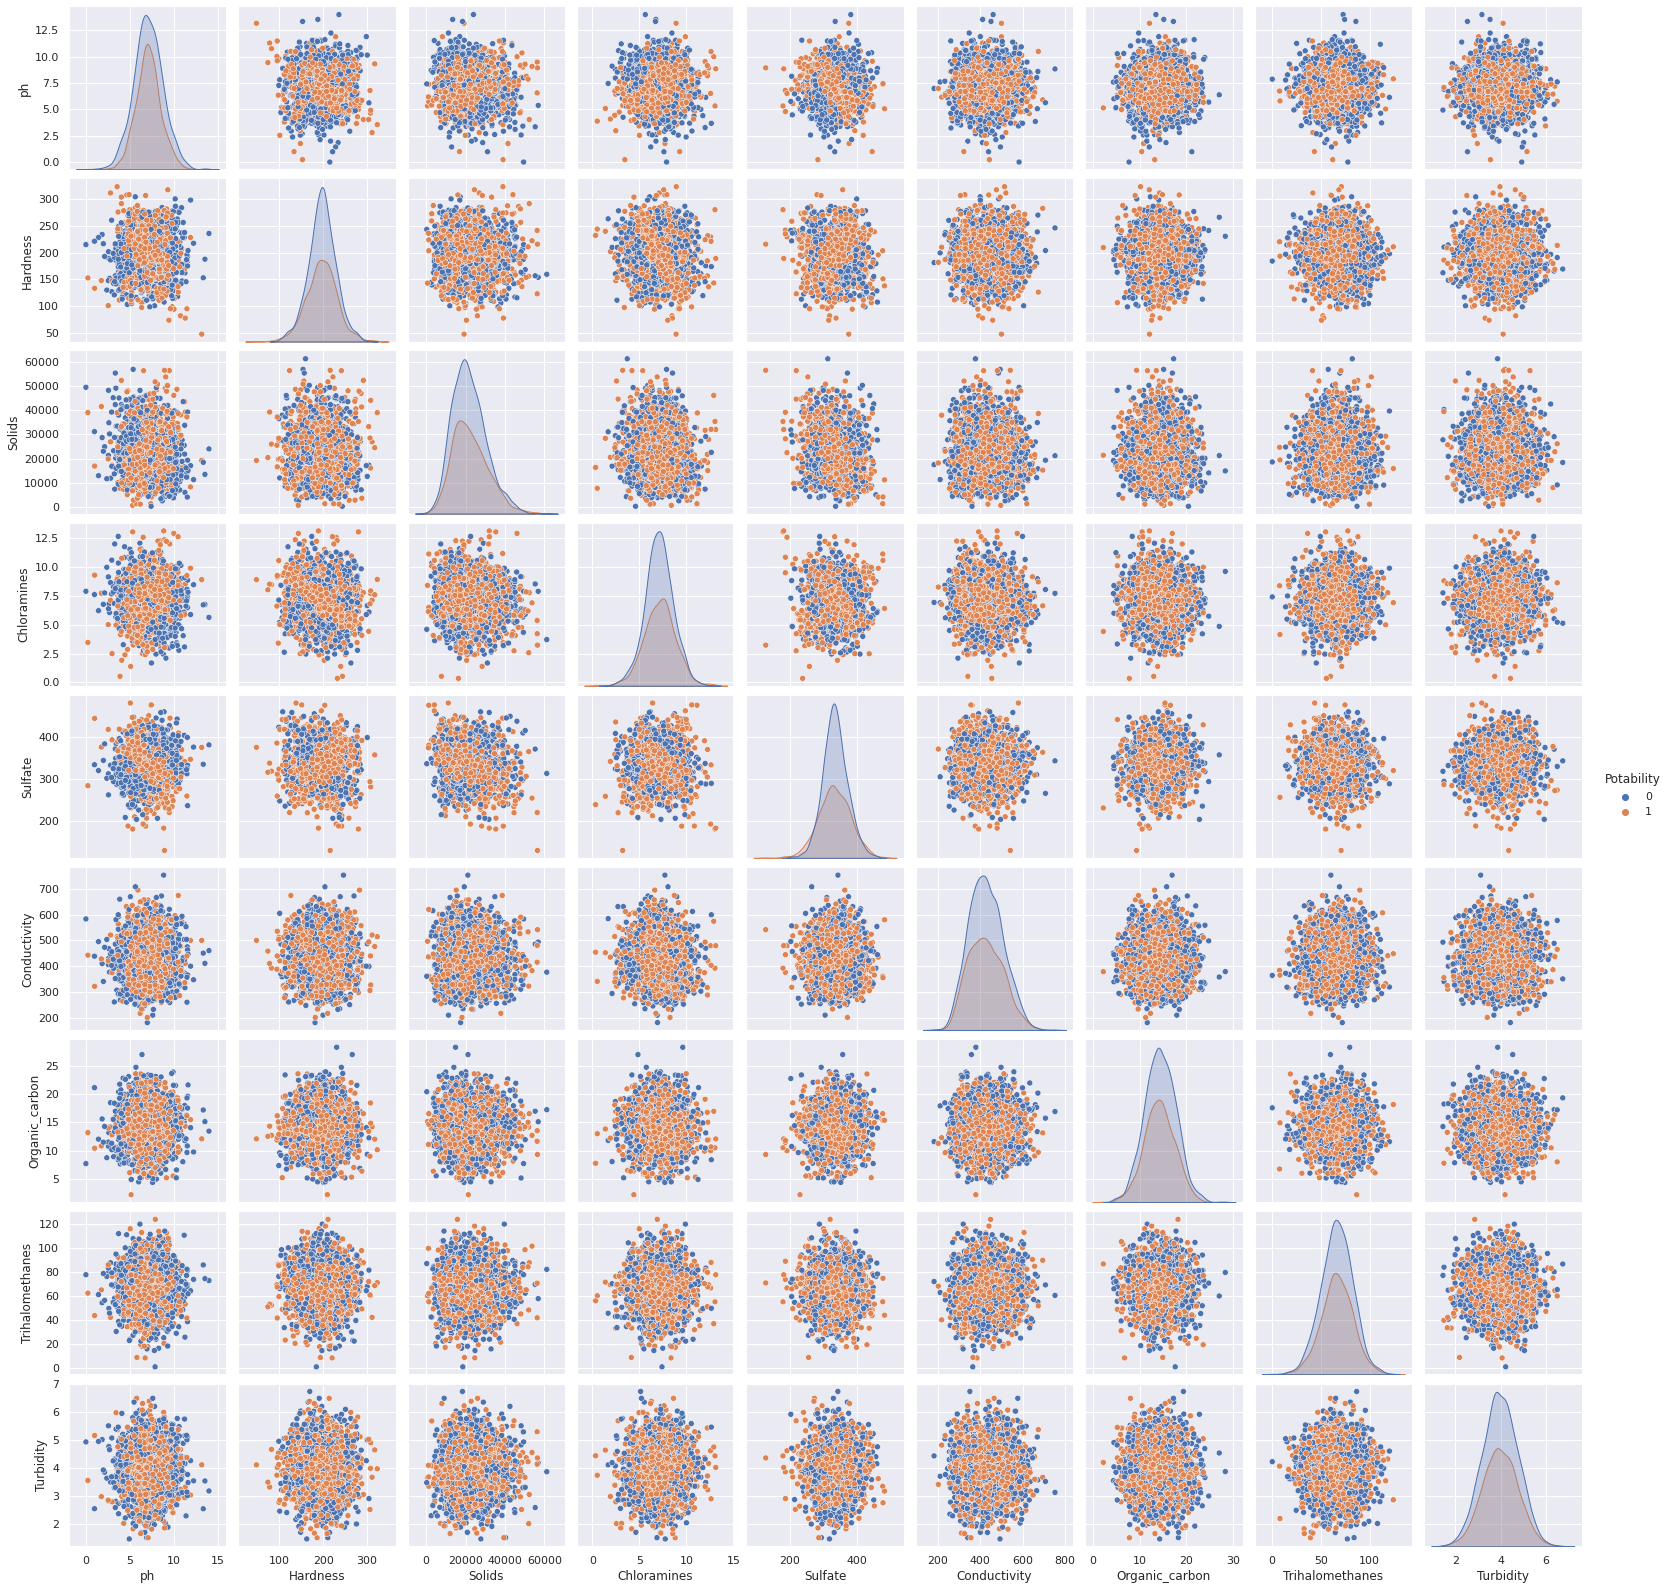

In [21]:
#corrélation entre les variables par rapport au PH - bleue = 0 et orange = 1

sns.pairplot(data, hue = "Potability") 

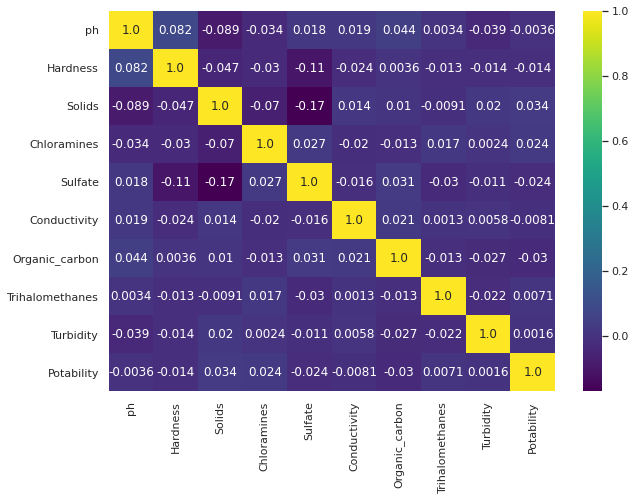

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt=".2", cmap='viridis') 
plt.show()

On observe donc une corrélation proche de 0 pour chaque données (de meme avec les graphiques)

In [23]:
corr = data.corr()
corr['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

Les solides et les chloramines sont les plus positivement corrélés, Organic_carbon et Sulfate sont les plus négativement corrélés.

**pH**

In [24]:
data[['ph', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,ph
Potability,
0,7.085378
1,7.073783


La différence n'est pas énorme, le ph est légèrement inférieur lorsque l'eau est potable.

**Hardness**

In [25]:
data[['Hardness', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Hardness
Potability,
0,196.733292
1,195.800744


Comme auparavant, la différence est faible, la dureté est légèrement inférieure lorsque l'eau est potable.

**Solids**

In [26]:
data[['Solids', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Solids
Potability,
0,21777.490788
1,22383.991018


Les solides semblent plus élevés lorsque l'eau est potable.

**Chloramines**

In [27]:
data[['Chloramines', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Chloramines
Potability,
0,7.092175
1,7.169338


Les chloramines sont légèrement plus élevées lorsque l'eau est potable.

**Sulfate**


In [28]:
data[['Sulfate', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Sulfate
Potability,
0,334.564290
1,332.566990


Le sulfate semble plus faible lorsque l'eau est potable.

**Conductivity**

In [29]:
data[['Conductivity', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Conductivity
Potability,
0,426.730454
1,425.383800


La conductivité semble plus faible lorsque l'eau est potable.

**Organic_carbon**


In [30]:
data[['Organic_carbon', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Organic_carbon
Potability,
0,14.364335
1,14.160893


Organic_carbon est plus faible lorsque l'eau est potable.

**Trihalomethanes**


In [31]:
data[['Trihalomethanes', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Trihalomethanes
Potability,
0,66.303555
1,66.539684


Les trihalométhanes sont légèrement plus élevés lorsque l'eau est potable.

**Turbidity**

In [32]:
data[['Turbidity', 'Potability']].groupby('Potability').mean().style.background_gradient('Reds')

,Turbidity
Potability,
0,3.965800
1,3.968328


La différence n'est pas énorme, la turbidité semble légèrement plus élevée lorsque l'eau est potable.

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Partie traitement : « pre-processing » 🌊 </h1></div> 

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
Le prétraitement des données (également connu sous le nom de nettoyage des données, de querelles de données ou de grignotage des données) est le processus par lequel les données sont soumises à diverses vérifications et examens afin de remédier aux problèmes de valeurs manquantes, de fautes d’orthographe, de normalisation / normalisation des valeurs telles qu’elles soient comparables, de transformation des données (par exemple, transformation logarithmique), etc.
 </p></font></div>


<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

# Outliers

Les algorithmes d’apprentissage automatique sont sensibles à la plage et à la distribution des valeurs d’attribut. Les valeurs aberrantes de données peuvent gâcher et induire en erreur le processus d’apprentissage, ce qui entraîne des temps d’apprentissage plus longs, des modèles moins précis et, en fin de compte, des résultats plus médiocres. Il est donc necessaire de les enlever.
</p></font></div>


In [34]:
def del_outliers(data, columns): #fonction permettant la suppression des valeurs abérentes
    indices = []
    for col in columns : # pour chaque colonnes on enleve les valeurs qui dépasse le 1er et le 3eme quartile
        Q1 = np.nanpercentile(data[col],25)
        Q3 = np.nanpercentile(data[col],75)
        IQR15 = (Q3 - Q1) * 1.5
        outliers_list = data[(data[col] < Q1 - IQR15) | (data[col] > Q3 + IQR15)].index
        indices.extend(outliers_list)
        
    indices = Counter(indices)
    multiple_outliers = list(i for i, v in indices.items() if v > 1.5) # indices qui apparaissent plusieurs fois
    
    print("Number of multiple outliers : ",len(data.loc[multiple_outliers]))
    
    return data.drop(multiple_outliers, axis=0).reset_index(drop=True)

data = del_outliers(data, data.columns[:-1])
data.shape

Number of multiple outliers :  39


(3237, 10)

# Missing Data

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
Une première solution serai d'effacer les lignes qui ont des valeurs NaN. Mais ce n’est pas un bon choix car de cette manière, nous perdons les informations, en particulier lorsque nous travaillons avec de petits ensembles de données.

In [35]:
print('Old size: %d' % len(data))
data_propre = data.dropna(how = 'any', axis = 'rows') # suppression des lignes contenant des valeurs NaN
print('New size: %d' % len(data_propre))

Old size: 3237
New size: 1987


In [36]:
print(data_propre.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
Nous utiliserons donc KNImputer() qui permet de remplir ou prédire les valeurs manquantes dans un jeu de données. C’est une méthode plus utile qui fonctionne sur l’approche de base de l’algorithme KNN plutôt que sur l’approche naïve de remplir toutes les valeurs avec la moyenne ou la médiane. Dans cette approche, nous spécifions une distance par rapport aux valeurs manquantes qui est également connue sous le nom de paramètre K. La valeur manquante sera prédite en fonction de la moyenne des voisins.

In [37]:
knnImputer = KNNImputer() # Need normalization before
data = pd.DataFrame(knnImputer.fit_transform(data), columns=data.columns)

# data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)
# data['ph'].fillna(data['ph'].mean(), inplace=True)
# data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)
# data.head()

print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
 
# Skewness Correction

Nous avons également pu voir dans la partie EDA une asymétrie de distribution pour certaines données, il est donc necessaire de faire une correction afin d'optimser nos apprentisages.

Boxcox est une technique de transformation utile pour stabiliser la variance,rendre les données et la distribution plus normales, améliorer la validité des mesures d’association.


Columns : Solids, Conductivity

**Solids**

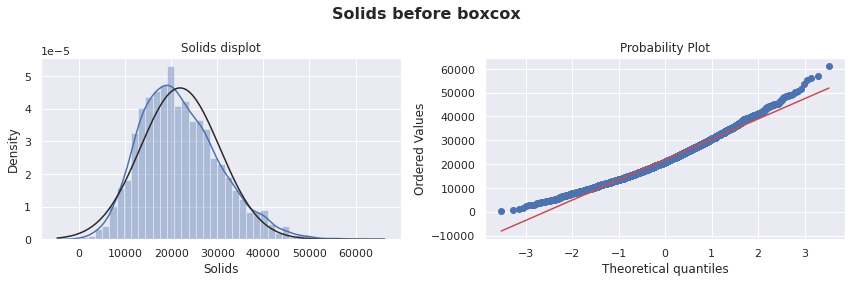

In [38]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Solids before boxcox', weight='bold', fontsize=16)
ax[0].set_title('Solids displot')
sns.distplot(data['Solids'], fit=norm, ax=ax[0])
probplot(data['Solids'], plot=plt)
plt.tight_layout()
plt.show()

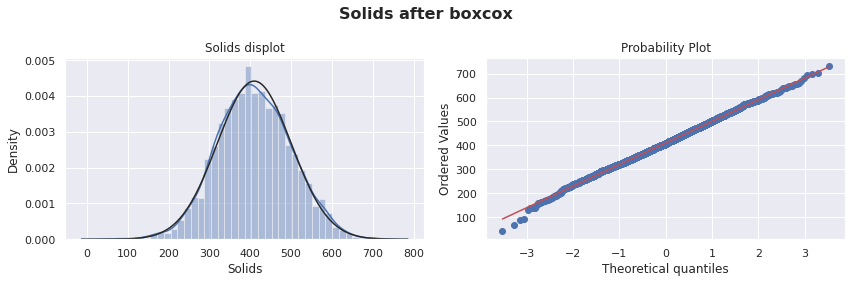

In [39]:
data['Solids'], _ = boxcox(data['Solids'])

fig, ax = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Solids after boxcox', weight='bold', fontsize=16)
ax[0].set_title('Solids displot')
sns.distplot(data['Solids'], fit=norm, ax=ax[0])
probplot(data['Solids'], plot=plt)
plt.tight_layout()
plt.show()

**Conductivity**

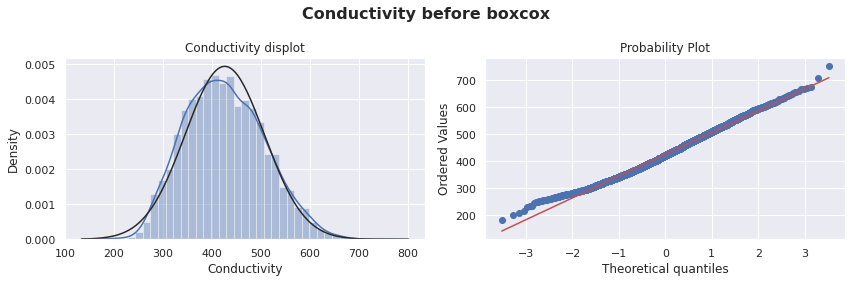

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Conductivity before boxcox', weight='bold', fontsize=16)
ax[0].set_title('Conductivity displot')
sns.distplot(data['Conductivity'], fit=norm, ax=ax[0])
probplot(data['Conductivity'], plot=plt)
plt.tight_layout()
plt.show()

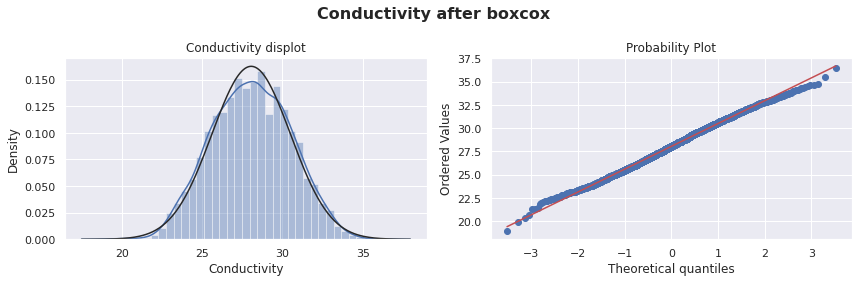

In [41]:
data['Conductivity'], _ = boxcox(data['Conductivity'])

fig, ax = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Conductivity after boxcox', weight='bold', fontsize=16)
ax[0].set_title('Conductivity displot')
sns.distplot(data['Conductivity'], fit=norm, ax=ax[0])
probplot(data['Conductivity'], plot=plt)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

# Normalisation

La normalisation est une technique souvent appliquée dans le cadre de la préparation des données pour l’apprentissage automatique. L’objectif de la normalisation est de modifier les valeurs des colonnes numériques dans le jeu de données à une échelle commune, sans fausser les différences dans les plages de valeurs. Ainsi, la normalisation d’un jeu de données est une exigence courante pour de nombreux estimateurs d’apprentissage automatique : ils peuvent se comporter mal si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données standard normalement distribuées.

Nous allons ici utiliser StandardScaler() qui va nous permettre de normaliser les entités en supprimant la moyenne et la mise à l’échelle en fonction de la variance de l’unité

In [42]:
X = data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y = data['Potability']

scaler = StandardScaler() # on normalise
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.053991,0.259637,-0.037624,0.112925,0.954565,1.625284,-1.188178,1.301658,-1.289179
1,-2.293278,-2.091760,-0.298815,-0.314597,0.064170,1.920941,0.268561,-0.641239,0.686648
2,0.696798,0.862408,-0.142615,1.383132,-0.090861,-0.036612,0.781012,-0.001819,-1.169926
3,0.845271,0.555104,0.105157,0.600982,0.635166,-0.755126,1.256823,2.147628,0.851284
4,1.374282,-0.481572,-0.380178,-0.371590,-0.648721,-0.292077,-0.830536,-2.182982,0.139745


<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

# **Fractionnement train-test**

Il est souhaitable que le modèle formé fonctionne bien sur de nouvelles données invisibles. Afin de simuler les nouvelles données invisibles, les données disponibles sont soumises à un fractionnement des données par lequel elles sont divisées en 2 parties (parfois appelées division train-essai). En particulier, la première partie est le sous-ensemble de données plus grand qui est utilisé comme jeu d’apprentissage (par exemple, représentant 80 % des données d’origine) et la seconde est normalement un sous-ensemble plus petit et utilisé comme jeu de test (les 20 % restants des données). Il convient de noter qu’un tel fractionnement des données est effectué une fois. Ensuite, le jeu d’apprentissage est utilisé pour créer un modèle prédictif et ce modèle formé est ensuite appliqué sur le jeu de test(c’est-à-dire servant de nouvelles données invisibles) pour effectuer des prédictions. La sélection du meilleur modèle est effectuée sur la base des performances du modèle sur l’ensemble de test et dans les efforts pour obtenir le meilleur modèle possible, l’optimisation des hyperparamètres peut également être effectuée.

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.8, random_state=42) # separation avec le pourcentage train_size

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2589, 9) (648, 9) (2589,) (648,)


<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

# Smote (Synthetic Minority Over-Sampling TEchnique)

Smote est une technique utilisée pour traiter des ensembles de données déséquilibrés. Cela va ainsi réequilibrer notre dataset afin d'optimiser nos apprentissages.

In [44]:
smote = SMOTE(random_state = 0)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)


print(f"Without SMOTE :\n{Y_train.value_counts()}")
print(f"\nWith SMOTE :\n{Y_train_smote.value_counts()}")


Without SMOTE :
0.0    1557
1.0    1032
Name: Potability, dtype: int64

With SMOTE :
0.0    1557
1.0    1557
Name: Potability, dtype: int64


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">  Model Building 🌊 </h1></div> 

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
Maintenant, vient la partie où nous arrivons à utiliser les données préparées pour la construction de modèles. Selon le type de données (qualitatives ou quantitatives) de la variable cible (communément appelée variable Y), nous allons soit construire une classification (si Y est qualitatif), soit un modèle de régression (si Y est quantitatif).

Nous allons commencer a tester les modeles sur data_propre (suppression des lignes contenants une ou plusieurs valeurs NaN).

Voici ci dessous la liste des modeles utiliser :

- LogisticRegression :

La régression logistique est un algorithme de classification d’apprentissage supervisé utilisé pour prédire la probabilité d’une variable cible. La nature de la variable cible ou dépendante est dichotomique, ce qui signifie qu’il n’y aurait que deux classes possibles.
En termes simples, la variable dépendante est de nature binaire et les données sont codées comme 1 (signifie succès/oui) ou 0 (signifie échec/non).

**Avantages:**

1. La régression logistique fonctionne bien lorsque l'ensemble de données est linéairement séparable.q
2. La régression logistique est moins sujette au sur-ajustement, mais elle peut sur-ajuster dans des ensembles de données de grande dimension. Vous devriez envisager des techniques de régularisation (L1 et L2) pour éviter le surajustement dans ces scénarios.
3. La régression logistique donne non seulement une mesure de la pertinence d'un prédicteur (taille du coefficient), mais aussi de son sens d'association (positif ou négatif).
4. La régression logistique est plus facile à mettre en œuvre, à interpréter et très efficace à entraîner.

**Inconvénients**

1. La principale limitation de la régression logistique est l'hypothèse de linéarité entre la variable dépendante et les variables indépendantes. Dans le monde réel, les données sont rarement séparables linéairement. La plupart du temps, les données seraient un désordre confus.
2. Si le nombre d'observations est inférieur au nombre d'entités, la régression logistique ne doit pas être utilisée, sinon elle peut conduire à un surajustement.
3. La régression logistique ne peut être utilisée que pour prédire des fonctions discrètes. Par conséquent, la variable dépendante de la régression logistique est limitée à l'ensemble de nombres discrets. Cette restriction elle-même est problématique, car elle est prohibitive pour la prédiction de données continues.

- RandomForest :

Random forest est un algorithme d’apprentissage automatique couramment utilisé qui combine la sortie de plusieurs arbres de décision pour atteindre un résultat unique. Sa facilité d’utilisation et sa flexibilité ont alimenté son adoption, car il gère à la fois les problèmes de classification et de régression.

**Avantages:**

1. Il réduit le surajustement dans les arbres de décision et contribue à améliorer la précision
2. Il est flexible pour les problèmes de classification et de régression
3. Il fonctionne bien avec les valeurs catégorielles et continues
4. Il automatise les valeurs manquantes présentes dans les données
5. La normalisation des données n’est pas nécessaire car elle utilise une approche basée sur des règles.

**Inconvénients**

1. Il nécessite beaucoup de puissance de calcul ainsi que des ressources car il construit de nombreux arbres pour combiner leurs sorties.
2. Il nécessite également beaucoup de temps pour la formation car il combine beaucoup d’arbres de décision pour déterminer la classe.
3. En raison de l’ensemble des arbres de décision, il souffre également d’interprétabilité et ne parvient pas à déterminer la signification de chaque variable.


- SVC :

L’algorithme trace chaque élément de données en tant que point dans un espace à n dimensions (où n est un nombre d’entités dont vous disposez), la valeur de chaque entité étant la valeur d’une coordonnée particulière. Ensuite, nous effectuons la classification en trouvant l’hyper-plan qui différencie très bien les deux classes

**Avantages:**
1. Il fonctionne relativement bien lorsqu’il existe une marge de séparation claire entre les classes.
2. Il est plus efficace dans les espaces de haute dimension.
3. Il est efficace dans les cas où le nombre de dimensions est supérieur au nombre d’échantillons.
4. Il est relativement efficace en mémoire

**Inconvénients**
1. L’algorithme SVC ne convient pas aux grands ensembles de données.
2. Il ne fonctionne pas très bien lorsque l’ensemble de données a plus de bruit, c’est-à-dire que les classes cibles se chevauchent.
3. Dans les cas où le nombre de fonctionnalités pour chaque point de données dépasse le nombre d’échantillons de données d’apprentissage, la SVC sera sous-performante.

- KNeighborsClassifier :

KNN fonctionne sur un principe en supposant que chaque point de données tombant à proximité les uns des autres tombe dans la même classe. En d’autres termes, il classifie un nouveau point de données en fonction de la similarité.

**Avantages de KNN**
1. Un algorithme simple et facile à comprendre.
2. Utilisé pour les données non linéaires.
3. L’algorithme polyvalent utilisé à la fois pour la classification et la régression.
4. Donne une grande précision, mais il y a plus de bons algorithmes dans les modèles supervisés.
5. L’algorithme ne demande pas de créer un modèle, de régler plusieurs paramètres de modèle ou de faire des hypothèses supplémentaires.

**Inconvénients de KNN**
 
1. L’exigence d’un stockage élevé.
2. Taux de prédiction lent.
3. Stocke toutes les données d’apprentissage.
4. L’algorithme est plus lent lorsque le nombre d’exemples, de prédicteurs ou de variables indépendantes augmente.

- GradBoosting :

Dans l’apprentissage automatique, nous utilisons l’amplification de gradient pour résoudre les problèmes de classification et de régression. Il s’agit d’une technique d’apprentissage séquentiel d’ensemble où les performances du modèle s’améliorent au fil des itérations. Cette méthode crée le modèle de manière par étapes. 

**Avantages**

1. Fournit souvent une précision prédictive qui ne peut pas être éclipsée.
2. Beaucoup de flexibilité - peut optimiser sur différentes fonctions de perte et fournit plusieurs options de réglage hyperparamétriques qui rendent l’ajustement de la fonction très flexible.
3. Aucun prétraitement des données requis - fonctionne souvent très bien avec des valeurs catégorielles et numériques telles quelle.
4. Traite les données manquantes - imputation non requise.

**Inconvénient**

1. Les modèles d’amplification de gradient continueront de s’améliorer pour minimiser toutes les erreurs. Cela peut trop insister sur les valeurs aberrantes et provoquer un surajustement.
2. Calcul coûteux - nécessitent souvent de nombreux arbres (>1000) qui peuvent être exhaustifs en temps et en mémoire.
3. La grande flexibilité se traduit par de nombreux paramètres qui interagissent et influencent fortement le comportement de l’approche (nombre d’itérations, profondeur de l’arbre, paramètres de régularisation, etc.). Cela nécessite une grande recherche de grille pendant le réglage.
4. De nature moins interprétative, bien que cela soit facilement résolu avec divers outils.


In [59]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

names = ["LogisticReg", "KNN", "SVC", "RandomForest", "GradBoosting"]
models = [LogisticRegression(), KNeighborsClassifier(), SVC(),
        RandomForestClassifier(), GradientBoostingClassifier()]
scores = []
i = 0

for model in models : # pour chaque modèle, on entraine puis on affiche le score sur nos données de test
    print("--------------   "+names[i]+"   --------------")
    model.fit(X_train_smote, Y_train_smote)
    predicted_classes = model.predict(X_test)
    accuracy = accuracy_score(Y_test,predicted_classes)
    print('Accuracy (%): ', accuracy * 100)
    print(classification_report(Y_test,predicted_classes))
    print("-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------")
    i+=1    
    scores.append(model.score(X_test, Y_test))
    
results = pd.DataFrame({"Model":names, "Score": scores}).sort_values(by='Score', ascending=False)
results.style.background_gradient("Blues")

--------------   LogisticReg   --------------
Accuracy (%):  47.0679012345679
              precision    recall  f1-score   support

         0.0       0.63      0.48      0.55       427
         1.0       0.31      0.44      0.36       221

    accuracy                           0.47       648
   macro avg       0.47      0.46      0.46       648
weighted avg       0.52      0.47      0.48       648

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
--------------   KNN   --------------
Accuracy (%):  57.71604938271605
              precision    recall  f1-score   support

         0.0       0.71      0.61      0.65       427
         1.0       0.41      0.52      0.45       221

    accuracy                           0.58       648
   macro avg       0.56      0.56      0.55       648
weighted avg       0.61      0.58      0.59       648

-----------------------------------------

,Model,Score
3,RandomForest,0.660494
2,SVC,0.612654
4,GradBoosting,0.584877
1,KNN,0.577160
0,LogisticReg,0.470679


<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  
  
- Les 4 meilleurs modèles sont SVC, RandomForest, KNN et GradientBoosting.
- La classification des modèles pourrait changer un peu en fonction de la répartition de Test_train.

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

# Optimisation des hyperparamètres

Les hyperparamètres sont essentiellement des paramètres de l’algorithme d’apprentissage automatique qui ont un impact direct sur le processus d’apprentissage et les performances de prédiction. Comme il n’y a pas de paramètres d’hyperparamètres « taille unique » qui fonctionneront universellement pour tous les jeux de données, il faudra donc effectuer une optimisation des hyperparamètres.

Modèles : GradBoosting, KNN, RandomForest et SVC 

# GradientBoosting

Best params : {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 500}
Best train score : 0.715506340546985
Test score 0.6296296296296297


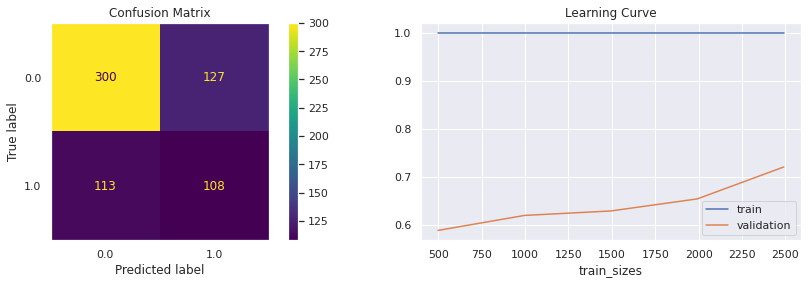


Classification Report :
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71       427
         1.0       0.46      0.49      0.47       221

    accuracy                           0.63       648
   macro avg       0.59      0.60      0.59       648
weighted avg       0.64      0.63      0.63       648

CPU times: user 18min 50s, sys: 117 ms, total: 18min 51s
Wall time: 18min 51s


In [48]:
%%time
params = {'learning_rate':[0.01,0.1], 'n_estimators':[500,1000],
            'max_features':['sqrt','log2'],'max_depth':[3,7,10]}
grid = GridSearchCV(GradientBoostingClassifier(), params)
grid.fit(X_train_smote, Y_train_smote)
print('Best params :', grid.best_params_)
print('Best train score :', grid.best_score_)
xgb = grid.best_estimator_
print('Test score', xgb.score(X_test, Y_test))

pred = xgb.predict(X_test)
N, train_score, val_score = learning_curve(xgb, X_train_smote,Y_train_smote, train_sizes=np.linspace(0.2,1,5))

fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title("Confusion Matrix")
plot_confusion_matrix(xgb, X_test, Y_test, ax=ax[0])
ax[0].grid(False)
ax[1].set_title("Learning Curve")
ax[1].plot(N, train_score.mean(axis=1), label="train")
ax[1].plot(N, val_score.mean(axis=1), label="validation")
ax[1].set_xlabel("train_sizes")
plt.legend()
plt.show()
print(f"\nClassification Report :\n{classification_report(Y_test, pred)}")

# KNN

Best params : {'leaf_size': 1, 'n_neighbors': 1}
Best train score : 0.7321976950034322
Test score 0.5694444444444444


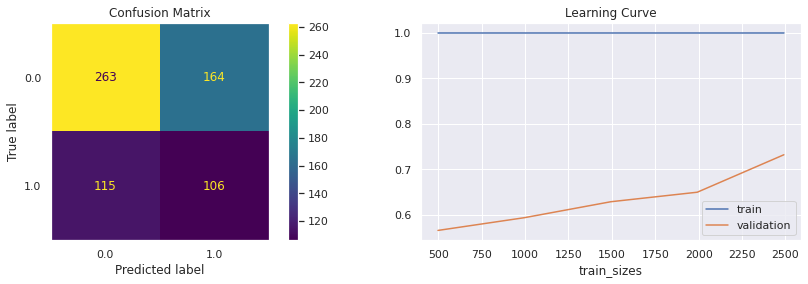


Classification Report :
              precision    recall  f1-score   support

         0.0       0.70      0.62      0.65       427
         1.0       0.39      0.48      0.43       221

    accuracy                           0.57       648
   macro avg       0.54      0.55      0.54       648
weighted avg       0.59      0.57      0.58       648



In [49]:
params = {'n_neighbors':np.arange(1,20,2), 'leaf_size':np.arange(1,10)}
grid = GridSearchCV(KNeighborsClassifier(), params)
grid.fit(X_train_smote, Y_train_smote)

print('Best params :', grid.best_params_)
print('Best train score :', grid.best_score_)
knn = grid.best_estimator_
print('Test score', knn.score(X_test, Y_test))

pred = knn.predict(X_test)
N, train_score, val_score = learning_curve(knn, X_train_smote, Y_train_smote, train_sizes=np.linspace(0.2,1,5))

fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title("Confusion Matrix")
plot_confusion_matrix(knn, X_test, Y_test, ax=ax[0])
ax[0].grid(False)
ax[1].set_title("Learning Curve")
ax[1].plot(N, train_score.mean(axis=1), label="train")
ax[1].plot(N, val_score.mean(axis=1), label="validation")
ax[1].set_xlabel("train_sizes")
plt.legend()
plt.show()

print(f"\nClassification Report :\n{classification_report(Y_test, pred)}")

# RandomForest

Best params : {'max_features': 3, 'n_estimators': 1500}
Best train score : 0.721927918535455
Test score 0.6558641975308642


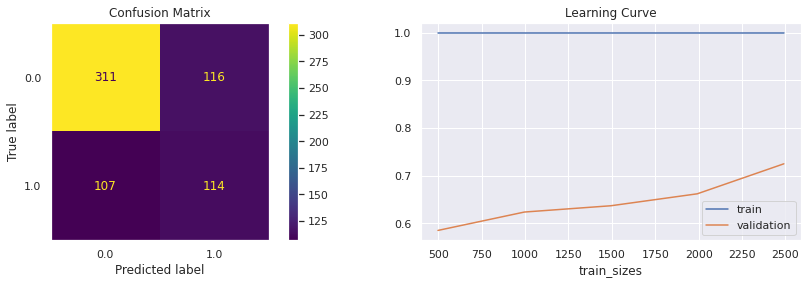


Classification Report :
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       427
         1.0       0.50      0.52      0.51       221

    accuracy                           0.66       648
   macro avg       0.62      0.62      0.62       648
weighted avg       0.66      0.66      0.66       648

CPU times: user 9min 13s, sys: 1.65 s, total: 9min 15s
Wall time: 9min 15s


In [50]:
%%time

params = {'n_estimators': [500, 750, 1000, 1500], 'max_features': [2, 3]}
grid = GridSearchCV(RandomForestClassifier(), params)
grid.fit(X_train_smote, Y_train_smote)

print('Best params :', grid.best_params_)
print('Best train score :', grid.best_score_)
rf = grid.best_estimator_
print('Test score', rf.score(X_test, Y_test))

pred = rf.predict(X_test)
N, train_score, val_score = learning_curve(rf, X_train_smote, Y_train_smote, train_sizes=np.linspace(0.2,1,5))

fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title("Confusion Matrix")
plot_confusion_matrix(rf, X_test, Y_test, ax=ax[0])
ax[0].grid(False)
ax[1].set_title("Learning Curve")
ax[1].plot(N, train_score.mean(axis=1), label="train")
ax[1].plot(N, val_score.mean(axis=1), label="validation")
ax[1].set_xlabel("train_sizes")
plt.legend()
plt.show()

print(f"\nClassification Report :\n{classification_report(Y_test, pred)}")

# SVC

Best params : {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best train score : 0.7495605229338385
Test score 0.6512345679012346


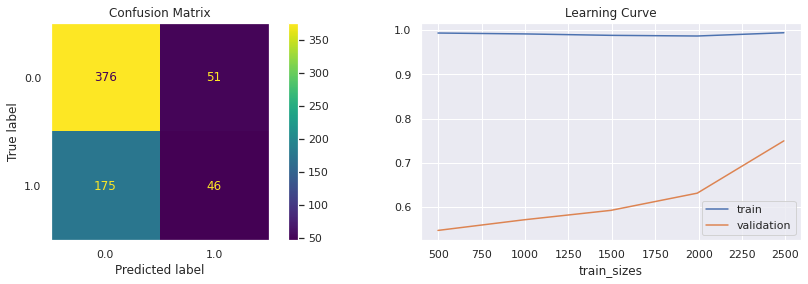


Classification Report :
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77       427
         1.0       0.47      0.21      0.29       221

    accuracy                           0.65       648
   macro avg       0.58      0.54      0.53       648
weighted avg       0.61      0.65      0.61       648



In [51]:
params = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01], 'kernel':['rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train_smote, Y_train_smote)

print('Best params :', grid.best_params_)
print('Best train score :', grid.best_score_)
svc = grid.best_estimator_
print('Test score', svc.score(X_test, Y_test))

pred = svc.predict(X_test)
N, train_score, val_score = learning_curve(svc, X_train_smote, Y_train_smote, train_sizes=np.linspace(0.2,1,5))

fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title("Confusion Matrix")
plot_confusion_matrix(svc, X_test, Y_test, ax=ax[0])
ax[0].grid(False)
ax[1].set_title("Learning Curve")
ax[1].plot(N, train_score.mean(axis=1), label="train")
ax[1].plot(N, val_score.mean(axis=1), label="validation")
ax[1].set_xlabel("train_sizes")
plt.legend()
plt.show()

print(f"\nClassification Report :\n{classification_report(Y_test, pred)}")

Train score 0.7533718689788054
Test score 0.6126543209876543


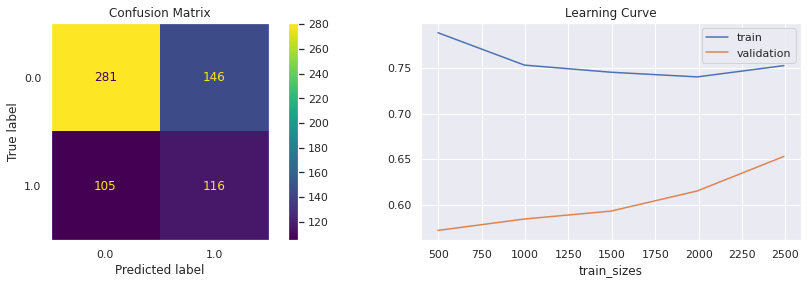


Classification Report :
              precision    recall  f1-score   support

         0.0       0.73      0.66      0.69       427
         1.0       0.44      0.52      0.48       221

    accuracy                           0.61       648
   macro avg       0.59      0.59      0.59       648
weighted avg       0.63      0.61      0.62       648



In [52]:
svc = SVC()
svc.fit(X_train_smote, Y_train_smote)
print('Train score', svc.score(X_train_smote, Y_train_smote))
print('Test score', svc.score(X_test, Y_test))

pred = svc.predict(X_test)
N, train_score, val_score = learning_curve(svc, X_train_smote, Y_train_smote, train_sizes=np.linspace(0.2,1,5))

fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title("Confusion Matrix")
plot_confusion_matrix(svc, X_test, Y_test, ax=ax[0])
ax[0].grid(False)
ax[1].set_title("Learning Curve")
ax[1].plot(N, train_score.mean(axis=1), label="train")
ax[1].plot(N, val_score.mean(axis=1), label="validation")
ax[1].set_xlabel("train_sizes")
plt.legend()
plt.show()

print(f"\nClassification Report :\n{classification_report(Y_test, pred)}")

SVC avec les hyperparamètres par défaut semble être meilleur que l'estimateur renvoyé par GridSearch.

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

# Modèle final
**Classificateur de vote**

La classe de sortie prédite est une classe avec la plus grande majorité de votes.

Test score 0.6404320987654321


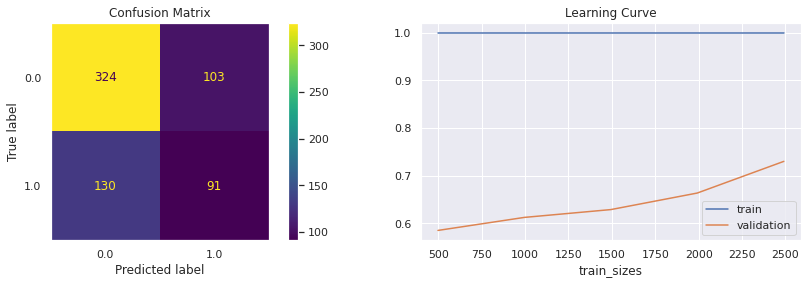


Classification Report :
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.74       427
         1.0       0.47      0.41      0.44       221

    accuracy                           0.64       648
   macro avg       0.59      0.59      0.59       648
weighted avg       0.63      0.64      0.63       648

CPU times: user 7min 25s, sys: 842 ms, total: 7min 26s
Wall time: 7min 26s


In [53]:
%%time

model = VotingClassifier(estimators=[("GradBoosting",xgb), ("KNN", knn), ("RandomForest", rf), ("SVC", svc)], voting='hard')
model.fit(X_train_smote, Y_train_smote)
print('Test score', model.score(X_test, Y_test))

pred = model.predict(X_test)
N, train_score, val_score = learning_curve(model, X_train_smote, Y_train_smote, train_sizes=np.linspace(0.2,1,5))

fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title("Confusion Matrix")
plot_confusion_matrix(model, X_test, Y_test, ax=ax[0])
ax[0].grid(False)
ax[1].set_title("Learning Curve")
ax[1].plot(N, train_score.mean(axis=1), label="train")
ax[1].plot(N, val_score.mean(axis=1), label="validation")
ax[1].set_xlabel("train_sizes")
plt.legend()
plt.show()

print(f"\nClassification Report :\n{classification_report(Y_test, pred)}")

Les différents modèles semblent avoir moins de difficultés sur la classe 0 qui était la classe majoritaire que sur la classe 1.
Nous pouvons voir sur les courbes d'apprentissage que la courbe de validation continue de s'améliorer.

<div class="alert alert-block alert-info"; style = "color:black;">
 <font face="Comic Sans MS" ; size=3> 
 <p align="justify">  

# Conclusion
- Les algorithmes ont tendance à se classer dans la classe majoritaire et nous pouvons traiter un ensemble de données déséquilibré avec SMOTE.
La précision ne semble pas beaucoup changer avec cette technique mais le score de rappel et le score f1 pour la classe minoritaire sont améliorés.
- Sur la base des courbes d'apprentissage, avec un ensemble de données plus important, nos modèles devraient obtenir de meilleures performances.